# Oleaje CMEMS

Datos descargados de la pagina web: https://data.marine.copernicus.eu/product/WAVE_GLO_PHY_SWH_L4_NRT_014_003/description
    https://data.marine.copernicus.eu/product/WAVE_GLO_PHY_SWH_L4_NRT_014_003/download?dataset=cmems_obs-wave_glo_phy-swh_nrt_multi-l4-2deg_P1D

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [2]:
dire = '/home/jovyan/shared/proyecto2/Oleaje/CMEMS/'

In [3]:
!ls /home/jovyan/shared/proyecto2/Oleaje/CMEMS/

cmems_obs-wave_glo_phy-swh_nrt_multi-l4-2deg_P1D_1677778805259.nc


# Explorando un unico fichero:

In [4]:
ds = xr.open_dataset(dire + 'cmems_obs-wave_glo_phy-swh_nrt_multi-l4-2deg_P1D_1677778805259.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:    (time: 366, latitude: 23, longitude: 28)
Coordinates:
  * latitude   (latitude) float32 -25.0 -23.0 -21.0 -19.0 ... 15.0 17.0 19.0
  * time       (time) datetime64[ns] 2021-03-01T12:00:00 ... 2022-03-01T12:00:00
  * longitude  (longitude) float32 -129.0 -127.0 -125.0 ... -79.0 -77.0 -75.0
Data variables:
    VAVH_INST  (time, latitude, longitude) float32 ...
Attributes: (12/37)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Significant Wave Height m...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2023-03-01T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2023-03-01T12:00:00Z
    title:                                          NRT merged all satellites...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

De estas variables solo nos interesa lon, lat y ssh_model (los datos interpolados a la malla del satelite)

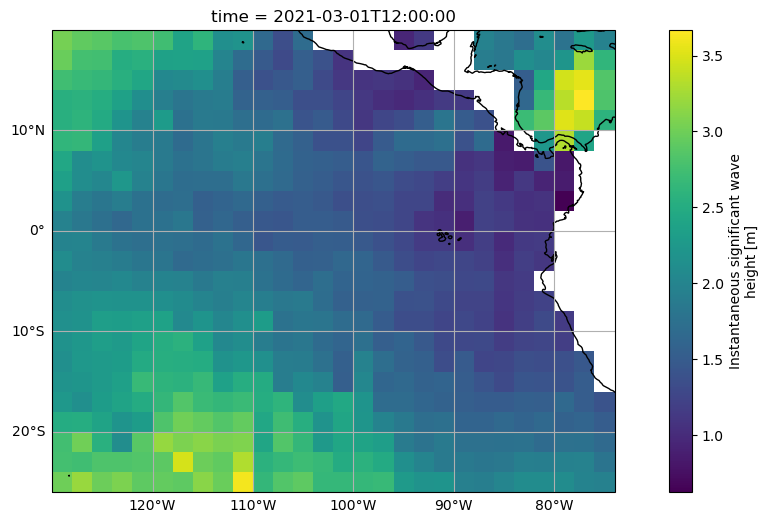

In [6]:
plt.figure(figsize=(14,6)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ds.VAVH_INST[0,:,:].plot(ax=ax1)# air.plot.contourf(ax=ax)
ax1.coastlines()
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


# Espectro

## Elegimos un punto en el map:

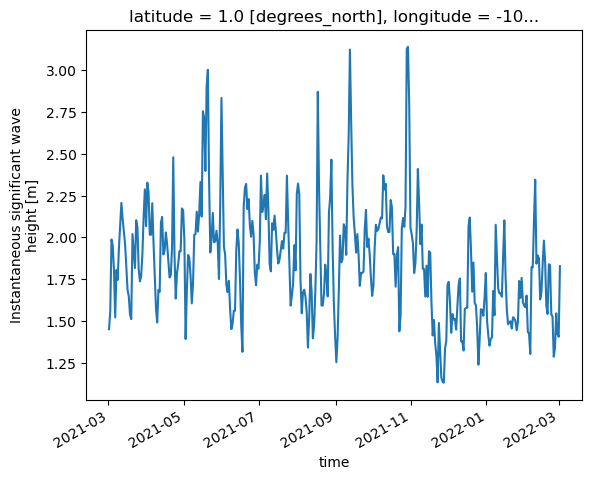

In [7]:
ds.VAVH_INST.sel(latitude=0, longitude=-110, method='nearest').plot();


## Conversión tiempo

In [8]:
ds.time

<xarray.DataArray 'time' (time: 366)>
array(['2021-03-01T12:00:00.000000000', '2021-03-02T12:00:00.000000000',
       '2021-03-03T12:00:00.000000000', ..., '2022-02-27T12:00:00.000000000',
       '2022-02-28T12:00:00.000000000', '2022-03-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-03-01T12:00:00 ... 2022-03-01T12:00:00
Attributes:
    axis:                 T
    long_name:            time
    standard_name:        time
    _ChunkSizes:          1
    _CoordinateAxisType:  Time
    valid_min:            25992.5
    valid_max:            26357.5

In [10]:
import numpy
import numpy.fft
from numpy.fft import fft, ifft

from matplotlib.dates import YearLocator, DateFormatter, date2num


In [11]:
sr = date2num(ds['time']) #[:].squeeze())


In [12]:
sr

array([18687.5, 18688.5, 18689.5, 18690.5, 18691.5, 18692.5, 18693.5,
       18694.5, 18695.5, 18696.5, 18697.5, 18698.5, 18699.5, 18700.5,
       18701.5, 18702.5, 18703.5, 18704.5, 18705.5, 18706.5, 18707.5,
       18708.5, 18709.5, 18710.5, 18711.5, 18712.5, 18713.5, 18714.5,
       18715.5, 18716.5, 18717.5, 18718.5, 18719.5, 18720.5, 18721.5,
       18722.5, 18723.5, 18724.5, 18725.5, 18726.5, 18727.5, 18728.5,
       18729.5, 18730.5, 18731.5, 18732.5, 18733.5, 18734.5, 18735.5,
       18736.5, 18737.5, 18738.5, 18739.5, 18740.5, 18741.5, 18742.5,
       18743.5, 18744.5, 18745.5, 18746.5, 18747.5, 18748.5, 18749.5,
       18750.5, 18751.5, 18752.5, 18753.5, 18754.5, 18755.5, 18756.5,
       18757.5, 18758.5, 18759.5, 18760.5, 18761.5, 18762.5, 18763.5,
       18764.5, 18765.5, 18766.5, 18767.5, 18768.5, 18769.5, 18770.5,
       18771.5, 18772.5, 18773.5, 18774.5, 18775.5, 18776.5, 18777.5,
       18778.5, 18779.5, 18780.5, 18781.5, 18782.5, 18783.5, 18784.5,
       18785.5, 1878

## Analisis espectral

In [13]:
x = ds.VAVH_INST.sel(latitude=0, longitude=-110, method='nearest')

In [14]:
x

<xarray.DataArray 'VAVH_INST' (time: 366)>
array([1.451, 1.559, 1.988, ..., 1.421, 1.405, 1.828], dtype=float32)
Coordinates:
    latitude   float32 1.0
  * time       (time) datetime64[ns] 2021-03-01T12:00:00 ... 2022-03-01T12:00:00
    longitude  float32 -109.0
Attributes:
    ancillary_variables:  VAVH_INST_SCORE VAVH_INST_NBR
    comment:              The gridded instantaneous significant wave height i...
    long_name:            Instantaneous significant wave height
    standard_name:        sea_surface_wave_significant_height
    units:                m
    _ChunkSizes:          [  1  90 180]

In [15]:
N = len(x)
t = np.arange(N)

n = np.arange(N)
T = N/sr
# T = N

In [18]:
T

array([0.01958528, 0.01958424, 0.01958319, 0.01958214, 0.01958109,
       0.01958005, 0.019579  , 0.01957795, 0.0195769 , 0.01957586,
       0.01957481, 0.01957376, 0.01957272, 0.01957167, 0.01957062,
       0.01956958, 0.01956853, 0.01956748, 0.01956644, 0.01956539,
       0.01956435, 0.0195633 , 0.01956225, 0.01956121, 0.01956016,
       0.01955912, 0.01955807, 0.01955703, 0.01955598, 0.01955494,
       0.01955389, 0.01955285, 0.0195518 , 0.01955076, 0.01954972,
       0.01954867, 0.01954763, 0.01954658, 0.01954554, 0.0195445 ,
       0.01954345, 0.01954241, 0.01954137, 0.01954032, 0.01953928,
       0.01953824, 0.01953719, 0.01953615, 0.01953511, 0.01953406,
       0.01953302, 0.01953198, 0.01953094, 0.0195299 , 0.01952885,
       0.01952781, 0.01952677, 0.01952573, 0.01952469, 0.01952364,
       0.0195226 , 0.01952156, 0.01952052, 0.01951948, 0.01951844,
       0.0195174 , 0.01951636, 0.01951532, 0.01951428, 0.01951324,
       0.0195122 , 0.01951115, 0.01951011, 0.01950907, 0.01950

In [19]:
X = np.fft.fftfreq(N, d=1)

freq = n/T 

In [20]:
X

array([ 0.        ,  0.00273224,  0.00546448,  0.00819672,  0.01092896,
        0.0136612 ,  0.01639344,  0.01912568,  0.02185792,  0.02459016,
        0.0273224 ,  0.03005464,  0.03278689,  0.03551913,  0.03825137,
        0.04098361,  0.04371585,  0.04644809,  0.04918033,  0.05191257,
        0.05464481,  0.05737705,  0.06010929,  0.06284153,  0.06557377,
        0.06830601,  0.07103825,  0.07377049,  0.07650273,  0.07923497,
        0.08196721,  0.08469945,  0.08743169,  0.09016393,  0.09289617,
        0.09562842,  0.09836066,  0.1010929 ,  0.10382514,  0.10655738,
        0.10928962,  0.11202186,  0.1147541 ,  0.11748634,  0.12021858,
        0.12295082,  0.12568306,  0.1284153 ,  0.13114754,  0.13387978,
        0.13661202,  0.13934426,  0.1420765 ,  0.14480874,  0.14754098,
        0.15027322,  0.15300546,  0.1557377 ,  0.15846995,  0.16120219,
        0.16393443,  0.16666667,  0.16939891,  0.17213115,  0.17486339,
        0.17759563,  0.18032787,  0.18306011,  0.18579235,  0.18

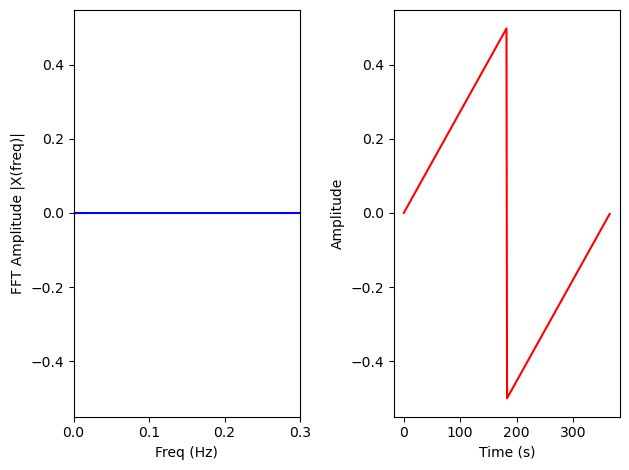

In [17]:


plt.figure()
plt.subplot(121)

plt.stem(freq, X, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 0.3)
plt.tight_layout()

plt.subplot(122)
plt.plot(t, X, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()